El bordado a punto cruz es una técnica de artesanía. Puede leer más al respecto en https://es.wikipedia.org/wiki/Punto_de_cruz

Usualmente con un número limitado de colores, se pueden crear imágenes

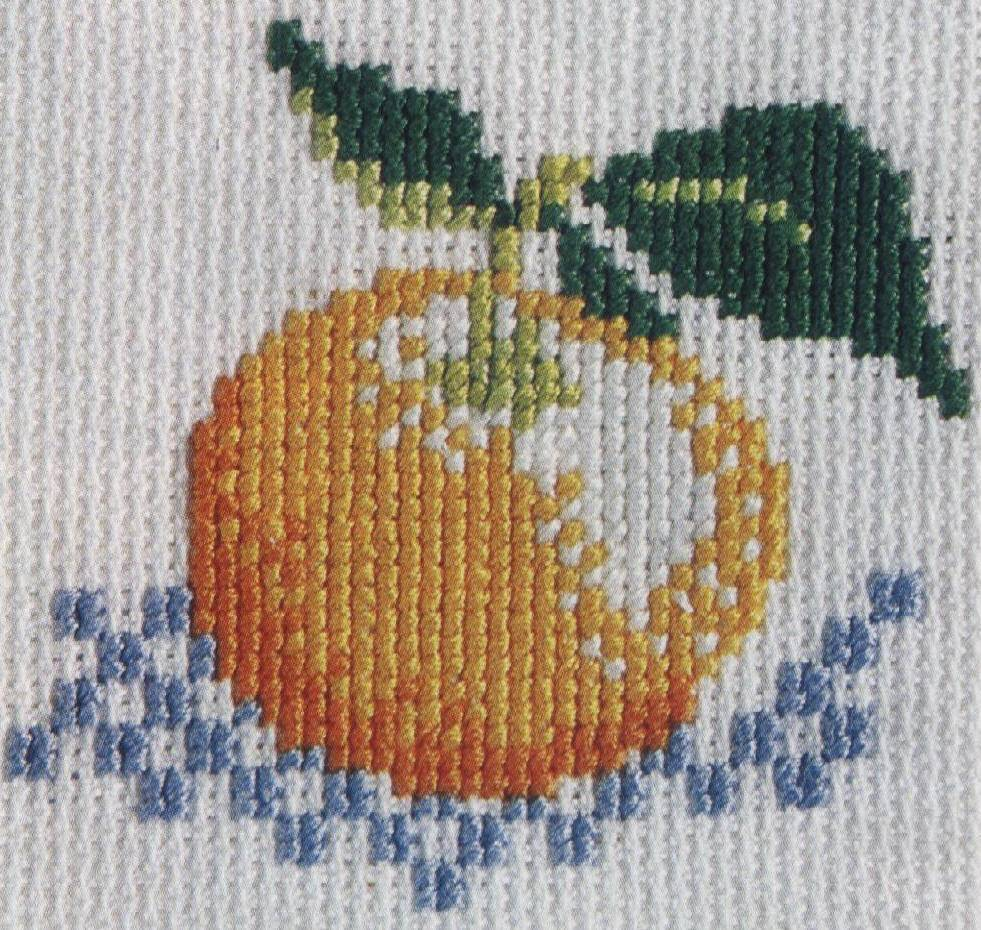

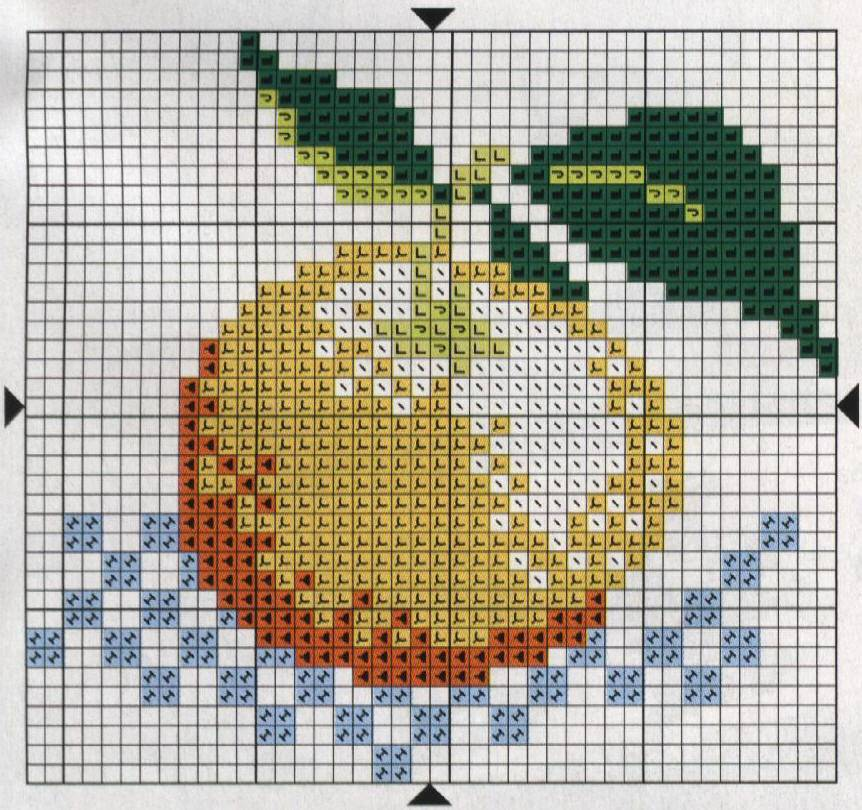

Use el método de clustering k-means de scikit-learn [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para crear una instrucción para el bordado de punto cruz, usando una cantidad limitada de colores, en base a una foto a colores (no usar la imágenes previas).

# Ejercicios

### Paso 1 - Lectura de una imagen a colores con un link

In [ ]:
###### Complete su código a continuación (escoja una imagen apropiada)

!gdown 1_uGwd1XCfE7EZOZOqLkk3FghvtlKfdPm

from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

### Paso 2 - realice el `resize` apropiado de una imagen

In [ ]:
#@title **Tamaño de la imagen destino**
ancho = 100 #@param {type:"slider", min:0, max:100, step:1}
alto = 100 #@param {type:"slider", min:0, max:100, step:1}
###### Complete su código a continuación

img = imread('gato.png')
img_resized = resize(img, (int(img.shape[0] * ancho / 100 ),
                           int(img.shape[1] * alto / 100)))

plt.imshow(img_resized)

### Paso 3 - realize la cuantización usando `sklearn.cluster.KMeans`

**Hint:** Probablemente necesitará hacer un `reshape` a la imagen

In [ ]:
#@title **Cantidad de colores**
k = 6 #@param {type:"slider", min:2, max:10, step:1}
###### Complete su código a continuación

def Cuantizar(arreglo, num_colores):
  shape_previo = arreglo.shape

  X = arreglo.reshape((-1,3))

  k_m = KMeans(num_colores).fit(X)

  colores = k_m.cluster_centers_
  indices = k_m.labels_

  return colores[indices].reshape(shape_previo), colores

img_cuantizada, colores = Cuantizar(img_resized,k)

plt.imshow(img_cuantizada)

### Paso 4 - Imprima la imagen cuantizada usando símbolos, como en el ejemplo abajo (6 puntos)

In [ ]:
###### Complete su código a continuación

char = ['+', '-', '_', 'a', '%', '*', ':']

colores_bn = np.flip(np.sort(colores.mean(axis = 1)))

img_bn = img_cuantizada.mean(axis=2)
for row in img_bn:
  for col in row:
    print(char[colores_bn.tolist().index(col)], end = ' ')
  print(' ')

### Paso 5 - Imprima la tabla de colores: número y color RGB  (4 puntos)

In [ ]:
###### Complete su código a continuación

fig = plt.figure(figsize = (2,2))

colores_cuadros = [plt.axes([i * 0.75, 0, 0.5, 0.5], facecolor = colores[i]) for i in range(len(colores))]

for i in range(len(colores_cuadros)):
  colores_cuadros[i].set_title(str(i+1), y = -0.25)

fig.canvas.draw()

In [ ]:
colores

# **Helper: Ejemplo de resultado esperado**

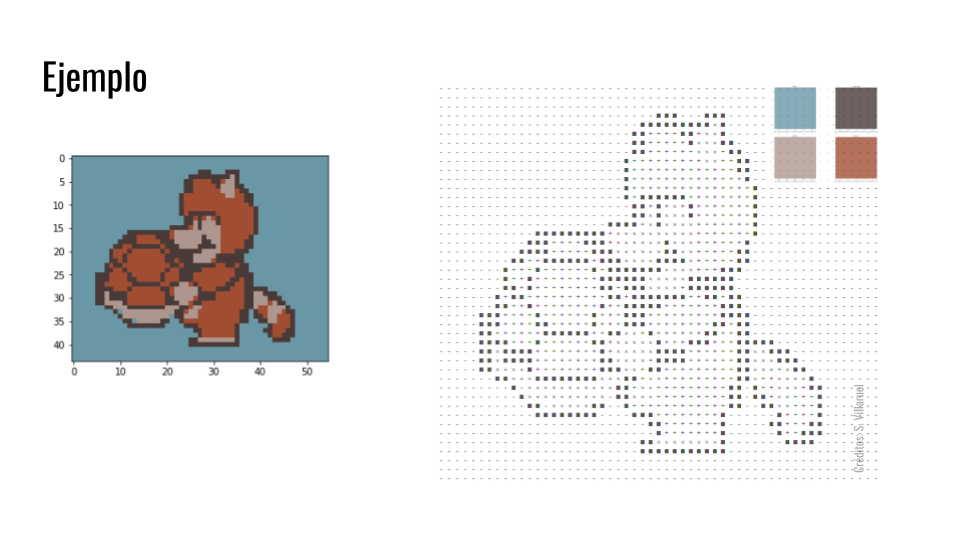

In [ ]:
def draw_chars(img_bn):
    for i,row in enumerate(img_bn):
        for j,col in enumerate(row):
            value = char[colores_bn.tolist().index(col)]
            if(value == '-'):
                plt.text(j, i, value, fontsize=5, ha='center', va='center', color=colores[2])
            elif(value == '*'):
                plt.text(j, i, value, fontsize=5, ha='center', va='center', color=colores[1])
            elif(value == '%'):
                plt.text(j, i, value, fontsize=2, ha='center', va='center', color=colores[0])
            elif(value == 'a'):
                plt.text(j, i, value, fontsize=2, ha='center', va='center', color=colores[5])
            elif(value == '_'):
                plt.text(j, i, value, fontsize=5, ha='center', va='center', color=colores[4])
            else:
                plt.text(j, i, value, fontsize=5, ha='center', va='center', color=colores[3])
    for i, color in enumerate(colores):
        plt.text((i*2.5) +5, 1, "▇", fontsize=10, ha='center', va='center', color=color)


In [ ]:
board = np.ones(img.shape)
plt.imshow(board)
draw_chars(img_bn)